In [3]:
from dotenv import load_dotenv

load_dotenv()

False

In [4]:
from langchain_ollama import ChatOllama

query = "인프런에서 어떤 강의가 있나요?"

llm = ChatOllama(model="qwen2.5-coder:3b")

llm.invoke(query)

AIMessage(content='인프런에서는 다양한 분야의 강의를 제공하고 있습니다. 인터넷 기술, 데이터베이스, 프로그래밍 언어 등에 대한 학습을 원하시면 관련 분야의 강의를 찾아보세요. 또한, 실시간 채팅이나 Q&A 등의 추가적인 교육 도구들도 제공되고 있으니 사용하시는 것을 추천드립니다.', additional_kwargs={}, response_metadata={'model': 'qwen2.5-coder:3b', 'created_at': '2026-02-08T12:10:47.518039Z', 'done': True, 'done_reason': 'stop', 'total_duration': 921643875, 'load_duration': 71424083, 'prompt_eval_count': 41, 'prompt_eval_duration': 115645041, 'eval_count': 84, 'eval_duration': 696139797, 'logprobs': None, 'model_name': 'qwen2.5-coder:3b', 'model_provider': 'ollama'}, id='lc_run--019c3d29-5bc1-78f1-a0bf-26b654552561-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 41, 'output_tokens': 84, 'total_tokens': 125})

In [ ]:
# State, Node, Edge, Conditional Edge

In [6]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class AgentState(TypedDict):
    messages: list[Annotated[AnyMessage, add_messages]]

In [7]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

In [8]:
def generate(state : AgentState) -> AgentState:
    message = state["messages"]
    ai_message = llm.invoke(message)
    return {'messages': [ai_message]}

In [9]:
from langgraph.graph import START, END

graph_builder.add_node('generate', generate)
graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)

In [10]:
graph= graph_builder.compile()

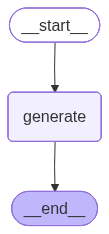

In [11]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
from langchain_core.messages import HumanMessage

initial_state = {'messages' : [HumanMessage(query)]}
graph.invoke(initial_state)

{'messages': [AIMessage(content="네, 인프런에서는 다양한 주제와 언어로 개발 관련 강의를 제공하고 있습니다. 각 분야마다 여러 가지 강의가 있지만, 기본적인 개발 언어와 기술들에 대한 내용은 다음과 같습니다:\n\n1. **Python**: Python 공부를 위해 'Python 기초부터 실전까지'나 'Python 웹 개발으로 시작하는 다양한 방법' 등과 같은 강의가 있습니다.\n\n2. **Java**: Java의 기본 개념, 스트림 API, Spring Boot 등의 주요 기술에 대한 강의들이 많습니다.\n\n3. **JavaScript**: JavaScript를 배우기 위해 'HTML/CSS와 함께 학습하기 위한 JavaScript의 기본부터 실전까지', 'Node.js 완벽 가이드' 등과 같은 강의가 있습니다.\n\n4. **C++**: C++을 위한 'C++ 개발자로 만들기 위한 다양한 방법', 'C++ STL과 알고리즘 활용법' 등의 강의가 있습니다.\n\n5. **React**: React를 학습하기 위해 'React 기초부터 실전까지', 'React Hooks와 상태 관리', 'Next.js 웹 프레임워크' 등과 같은 강의가 있습니다.\n\n6. **Vue.js**: Vue.js에 대한 'Vue.js 3로 개발하는 최신 방법', 'Vuex와 쿠키/세션 활용하기', 'Vue CLI를 사용한 프로젝트 구축' 등의 강의가 있습니다.\n\n7. **Node.js**: Node.js 개발을 위해 'Node.js 공부하기', 'Express.js 웹 서버 만들기', 'MongoDB와 데이터베이스 연동' 등과 같은 강의가 있습니다.\n\n8. **AWS, Azure, Google Cloud**: 클라우드 서비스를 배우기 위해 'AWS EC2, S3, RDS 사용법', 'Azure 리소스 관리', 'Google Cloud Platform 소개' 등의 강의가 있습니다.\n\n9. **DevOps**: DevOps와 CI/CD에 대한 강